In [1]:
import pandas as pd
import numpy as np

### Model selection and Cross-validation

#### (1) Cross-validation: evaluating estimator performance

http://scikit-learn.org/stable/modules/cross_validation.html

#### (2) Or it could be used for tuning hyper-parameters.

http://scikit-learn.org/stable/modules/grid_search.html#grid-search

#### Evaluating estimator performance.
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing supervised machine learning to hold out part of the available data as a test set (X_test, y_test), then to learn a model on the remaining (training) data and evaluate its accuracy on the test data.

#### Tuning hyper-parameters
If you have a model with important hyper-parameters (e.g., the amount of penalization for Lasso or Ridge regression), you can tune (find good values of) these hyperparameters by further splitting the training data into a training and validation set (still keeping the test data separate from these for a final, unbiased measure of performance).  To tune the hyper-parameters you can try a range of parameter values, learning from the (reduced) training set and evaluating performance on the validation set, and choose the hyper-parameters with best validation set performance.   

In [2]:
# Example data: predicting housing price using 311 calls for service
path = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/Bayesian/'
data4=pd.read_csv(path + "example4.csv", low_memory=False)
list_311=list(data4.loc[:,"Adopt A Basket":"X Ray Machine Equipment"].columns)
data5=data4[["sale_price","gross_sq_feet","mean"]+list_311]
data5.head()

,sale_price,gross_sq_feet,mean,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,600000,1624,80098.0,0.000000,0.027721,0.0,0.000000,0.000770,0.000257,0.001027,...,0.000000,0.000000,0.000000,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,5200000,3840,149723.0,0.000000,0.010675,0.0,0.000000,0.000227,0.000227,0.003861,...,0.000227,0.000227,0.000000,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0
2,100000,2120,84085.0,0.000000,0.002511,0.0,0.000000,0.001076,0.001973,0.000359,...,0.000000,0.000000,0.004484,0.000000,0.000179,0.007354,0.001256,0.069058,0.0,0.0
3,775000,3423,46614.0,0.000000,0.001476,0.0,0.000000,0.000170,0.006756,0.000738,...,0.000170,0.000170,0.000908,0.000568,0.000170,0.000454,0.000341,0.012433,0.0,0.0
4,151000,2136,44634.0,0.000049,0.001671,0.0,0.000049,0.000344,0.006143,0.000688,...,0.000491,0.000197,0.005897,0.000590,0.000393,0.001622,0.000442,0.037445,0.0,0.0


In [3]:
X=np.matrix(data5.iloc[:,1:])
y=np.asarray(data5.sale_price)
print X.shape
print y.shape

(2375L, 161L)
(2375L,)


In [4]:
# In-sample R^2 value for ridge regression using the whole training dataset
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(X,y)
1-((lm.predict(X)-y)**2).mean()/y.var()

0.8919251381230896

In [5]:
# How well do we do out of sample?  Let's split the data into 60% training, 40% test, and average performance over 10 random splits
from sklearn.model_selection import train_test_split

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    lm=linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    OS.append(1-((lm.predict(X_test)-y_test)**2).mean()/y_test.var()) # or equivalently: OS.append(lm.score(X_test,y_test))
print np.mean(OS)

-0.14311343271


In [6]:
# Does ridge regression do better out of sample?  Let's try with an arbitrary choice of penalization parameter alpha = 1.
OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)    
    lm=linear_model.Ridge(alpha=1)
    lm.fit(X_train,y_train)
    OS.append(1-((lm.predict(X_test)-y_test)**2).mean()/y_test.var()) # or equivalently: OS.append(lm.score(X_test,y_test))
print np.mean(OS)

0.536580673591


#### Hyper-parameter tuning.

http://scikit-learn.org/stable/modules/grid_search.html#grid-search

Exhaustive Grid Search. The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.

Now let's tune the hyper-parameters for ridge regression and calculate the OS R-squared using the new tuned alpha.

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-4, 0, 200)}

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    rid=linear_model.Ridge()
    gr=GridSearchCV(rid,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    print rs.best_params_
    OS.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())
print np.mean(OS)

{'alpha': 0.041026581058271942}
{'alpha': 0.041026581058271942}
{'alpha': 0.0001320088400831418}
{'alpha': 0.79340966657974921}
{'alpha': 0.36123426997094304}
{'alpha': 0.91158882997508273}
{'alpha': 0.045005576757004971}
{'alpha': 0.00040088063288984648}
{'alpha': 0.0001}
{'alpha': 0.00027682866303920667}
0.565438599794


### Decision Tree. 

Stop-and-Frisk Data set: https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

Please download the data set here or on NYU-Classes.
https://serv.cusp.nyu.edu/classes/ML_2016_Spring/ML_2017/

file: "session_3_stop.csv"

In [8]:
data=pd.read_csv("session_3_stop.csv")

In [9]:
data.columns

Index([u'suspected.crime', u'found.weapon', u'found.gun', u'arrested',
       u'frisked', u'searched', u'summons.issued', u'found.contraband',
       u'force.hands', u'force.wall', u'force.ground', u'force.drawn',
       u'force.pointed', u'force.baton', u'force.handcuffs', u'force.pepper',
       u'force.other', u'suspect.race', u'suspect.age', u'suspect.build',
       u'suspect.sex', u'suspect.height', u'suspect.weight',
       u'stopped.bc.desc', u'stopped.bc.violent', u'stopped.bc.other',
       u'stopped.bc.object', u'stopped.bc.casing', u'stopped.bc.lookout',
       u'stopped.bc.drugs', u'stopped.bc.clothing', u'stopped.bc.furtive',
       u'stopped.bc.bulge', u'precinct', u'inside.outside',
       u'location.housing', u'observation.period', u'officer.uniform',
       u'additional.report', u'additional.investigation',
       u'additional.proximity', u'additional.evasive',
       u'additional.associating', u'additional.direction',
       u'additional.highcrime', u'additional.time'

In [10]:
# remove records with any missing values
data=data.dropna()

# Let's take "found.weapon" as the target variable. 
y=data.loc[:,"found.weapon"]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=data.loc[:,"suspect.race":"time.period"]
X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print X_train.head()

        suspect.age  suspect.height  suspect.weight  stopped.bc.desc  \
93338            17        5.750000           175.0            False   
145921           15        5.166667           140.0            False   
19160            30        5.583333           260.0            False   
236337           23        5.333333           170.0            False   
46608            29        5.750000           180.0            False   

        stopped.bc.violent  stopped.bc.other  stopped.bc.object  \
93338                False             False              False   
145921               False              True              False   
19160                False              True              False   
236337               False             False               True   
46608                False             False              False   

        stopped.bc.casing  stopped.bc.lookout  stopped.bc.drugs  \
93338               False               False             False   
145921               True     

#### Part one: IS and OS Accuracy of prediction. 

DecisionTreeClassifier:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [11]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print 'In sample accuracy:',dt.score(X_train,y_train)

# out of sample accuracy
print 'Out of sample accuracy:',dt.score(X_test,y_test)

In sample accuracy: 0.999980169452
Out of sample accuracy: 0.944417453267


### Practice #1: Get the average OS accuracy over 10 train/test splits 

In [12]:
OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)    
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print np.mean(OS)

0.943361327041


#### Does that mean our model is super good? However... 

In [13]:
# What would our accuracy be if we predicted 0 (no weapon found) for everyone?
print 1.*len(y_test[y_test==0])/len(y_test)

0.964776513048


### Let's use area under the receiver operating characteristic curve ("ROC AUC") instead of accuracy.

ROC, Area under the curve:
http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Youtube:
https://www.youtube.com/watch?v=hnRBl9-BzjQ

In [14]:
from sklearn.metrics import roc_auc_score
AUC_OS=[]
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    # predict_proba predicts the probability of each class rather than just the most likely class
    pred=dt.predict_proba(X_test)[:,1] # predicted probability of y = 1
    AUC_OS.append(roc_auc_score(np.array(y_test),pred))
print "OS AUC",np.mean(AUC_OS)

OS AUC 0.621444808746


In [15]:
# How well would we expect to do just by chance?
chance_OS=[]
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)
    pred=np.random.random(len(X_test))
    chance_OS.append(roc_auc_score(np.array(y_test.apply(int)),pred))
print np.mean(chance_OS)

0.499153490506


### Control the complexity of the Decision Tree.

In [16]:
# Let's just use a single train/test split for this part:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=999)
AUC_OS=[]
for i in range(2,500,25):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    AUC_OS.append(roc_auc_score(np.array(y_test),dt.predict_proba(X_test)[:,1]))

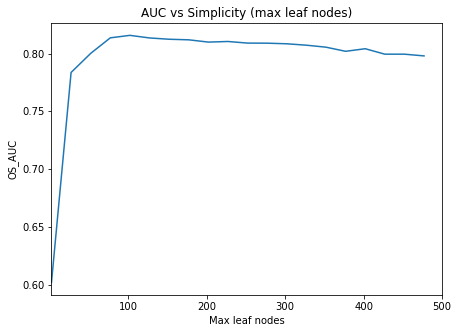

In [17]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),AUC_OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

In [18]:
# As an aside: predict_proba vs. predict
tm=pd.concat((pd.DataFrame(dt.predict_proba(X_test)),pd.DataFrame(dt.predict(X_test))),axis=1)
tm.head(5)

,0,1,0
0,0.287671,0.712329,True
1,0.992220,0.007780,False
2,0.992220,0.007780,False
3,0.992220,0.007780,False
4,0.992220,0.007780,False


In [19]:
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print rs.best_params_
print roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1])

{'max_depth': 8}
0.809441223421


### Feature Importance
Decision trees can be used for feature selection by calculating the Gini importance of each feature (higher = more important).

In [20]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
6,stopped.bc.object,0.347321
44,location.housing_transit,0.252415
13,precinct,0.0701739
11,stopped.bc.furtive,0.0638076
15,observation.period,0.0318963


In [21]:
# Let's generate our new training and testing model using the top three features.
X_train_simple=X_train.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]
X_test_simple=X_test.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train_simple, y_train)
print "The AUC score for this simple model with 3 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1])

The AUC score for this simple model with 3 features is 0.765267176308


### Visualize the Tree we built. 

In [22]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['no weapon found','weapon found'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="stopped.bc.object <= 0.5, samples = 201709, value = [194674, 7035], class = no weapon found", fillcolor="#e58139f6"] ;
1 [label="location.housing_transit <= 0.5, samples = 197033, value = [191647, 5386], class = no weapon found", fillcolor="#e58139f8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 192689, value = [188560, 4129], class = no weapon found", fillcolor="#e58139f9"] ;
1 -> 2 ;
3 [label="samples = 4344, value = [3087, 1257], class = no weapon found", fillcolor="#e5813997"] ;
1 -> 3 ;
4 [label="location.housing_transit <= 0.5, samples = 4676, value = [3027, 1649], class = no weapon found", fillcolor="#e5813974"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 4083, value = [2798, 1285], class = no weapon found", fillcolor="#e581398a"] ;
4 -> 5 ;
6 [label="samples = 593, va

If you want to install GraphViz on your own machine:

conda install graphviz

pip install pydot

pip install pydotplus

For people who experienced this error: "GraphViz's executables not found"

http://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

In [ ]:
# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['no weapon found','weapon found'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Random Forests

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [24]:
# same training data as above
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print roc_auc_score(y_test,pred)

0.801993214105


### Practice #2. Let's fix max_leaf_nodes=10, build forests with between 1 and 50 trees, and plot the AUC as a function of number of trees.

In [25]:
AUC=[]
for i in range(1,51,5):
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1,max_leaf_nodes=10)
    rf.fit(X_train, y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))
print AUC

[0.68915832534606747, 0.78794911988776128, 0.78905549469930547, 0.79621918814283088, 0.79615310531202932, 0.79683847041708122, 0.7996112328084527, 0.79927778716627362, 0.80405576963983416, 0.80488093028703944]


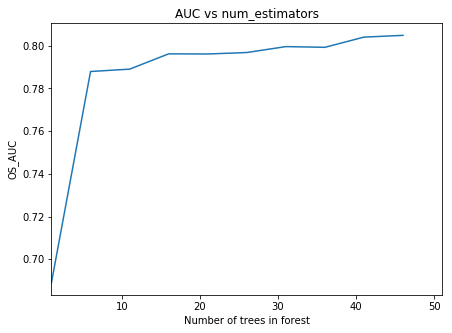

In [26]:
plt.figure(figsize=(7,5))
plt.plot(range(1,51,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,51)
plt.show()

### Practice #3.  Use GridSearchCV to optimize the hyperparameter, num_estimators.

In [27]:
param_grid = {'n_estimators':range(1,51,5)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print rs.best_params_
print roc_auc_score(np.array(y_test),pred)

{'n_estimators': 31}
0.79869801054


### Analyze the result (time permitting)

For this part, let's select two categorical features, and make two corresponding plots
comparing the average model prediction and empirical outcome for
each value of that feature. 

For example, if a chosen feature is
‘precinct’, the plot should have a point for each precinct, where the
x-value is the average model prediction for all stops in that precinct,
and the y-value is the average value of your target variable for all
stops in that precinct.

In [28]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=4,max_leaf_nodes=30)
rf.fit(X_train, y_train)

# Let's pick two features, age and precinct, and save them with the result
result=X_test.loc[:,['suspect.age','precinct']]
result=pd.concat((y_test,result),axis=1)
result['pred_prob']=rf.predict_proba(X_test)[:,1]
result.index=range(len(result))
result.head()

,found.weapon,suspect.age,precinct,pred_prob
0,True,38,75,0.458952
1,False,22,41,0.019597
2,False,33,26,0.024773
3,False,44,79,0.024897
4,False,21,40,0.017082


In [29]:
aa=result.groupby("precinct").apply(lambda x: x.loc[:,["found.weapon","pred_prob"]].mean()).reset_index()
aa.head()

,precinct,found.weapon,pred_prob
0,1,0.178571,0.209004
1,5,0.127168,0.116693
2,6,0.133858,0.121137
3,7,0.063232,0.059619
4,9,0.080780,0.067923


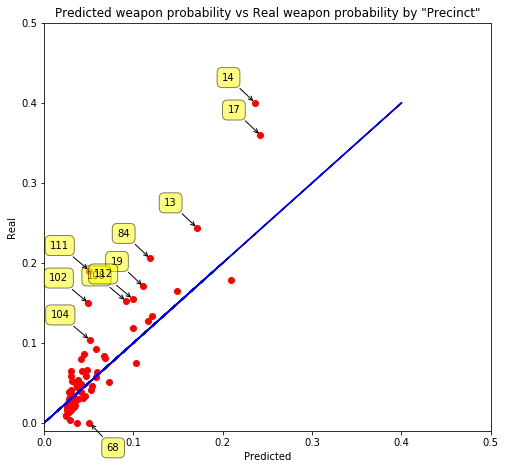

In [30]:
# For precinct:
plt.figure(figsize=(8,7.5))
plt.scatter(list(aa.loc[:,"pred_prob"]),list(aa.loc[:,"found.weapon"]),c="r")
plt.title('Predicted weapon probability vs Real weapon probability by "Precinct"')
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.xlim(0,0.5)
plt.ylim(-0.01,0.5)
plt.plot(list(aa.loc[:,"found.weapon"]),list(aa.loc[:,"found.weapon"]),'-b')

#Let's label the precincts for which our model does not work well.
for label, x, y in zip(list(aa.precinct), list(aa.loc[:,"pred_prob"]), list(aa.loc[:,"found.weapon"])):
    if x-y>0.05:
        
        plt.annotate(
            label, 
            xy = (x, y), xytext = (30, -30),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    if x-y<-0.05:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

### Practice #4

Repeat this process and plot the result for "suspect.age" or for any feature you prefer.

In [31]:
aa=result.groupby('suspect.age').apply(lambda x: x.loc[:,["found.weapon","pred_prob"]].mean()).reset_index()
aa.head()

,suspect.age,found.weapon,pred_prob
0,10,0.000000,0.022017
1,11,0.000000,0.036882
2,12,0.013158,0.029421
3,13,0.029316,0.032304
4,14,0.026056,0.029766


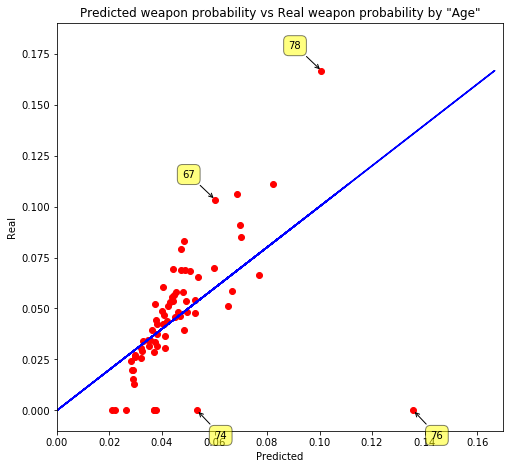

In [32]:
# For age:
plt.figure(figsize=(8,7.5))
plt.scatter(list(aa.loc[:,"pred_prob"]),list(aa.loc[:,"found.weapon"]),c="r")
plt.title('Predicted weapon probability vs Real weapon probability by "Age"')
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.xlim(0,0.17)
plt.ylim(-0.01,0.19)
plt.plot(list(aa.loc[:,"found.weapon"]),list(aa.loc[:,"found.weapon"]),'-b')

#Let's label the ages for which our model does not work well.
for label, x, y in zip(list(aa.loc[:,"suspect.age"]), list(aa.loc[:,"pred_prob"]), list(aa.loc[:,"found.weapon"])):
    if x-y>0.04:
        
        plt.annotate(
            label, 
            xy = (x, y), xytext = (30, -30),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    if x-y<-0.04:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()